<a href="https://colab.research.google.com/github/Vaishnavitycs/K-mean-clustering/blob/main/K_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [ ]:
df.shape

(19999, 785)

In [ ]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isna().sum()

6        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.586    0
0.587    0
0.588    0
0.589    0
0.590    0
Length: 785, dtype: int64

In [ ]:
df1 = df.drop_duplicates(subset= ["CustomerID"])

KeyError: Index(['CustomerID'], dtype='object')

In [ ]:
df1.shape

NameError: name 'df1' is not defined

In [ ]:
df1.drop(["CustomerID"], axis = 1, inplace = True)

In [ ]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
le = LabelEncoder()

In [ ]:
df1["Gender"] = le.fit_transform(df1["Gender"])

In [ ]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
x = df1.values
x[:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]])

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= "k-means++",random_state = 42)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

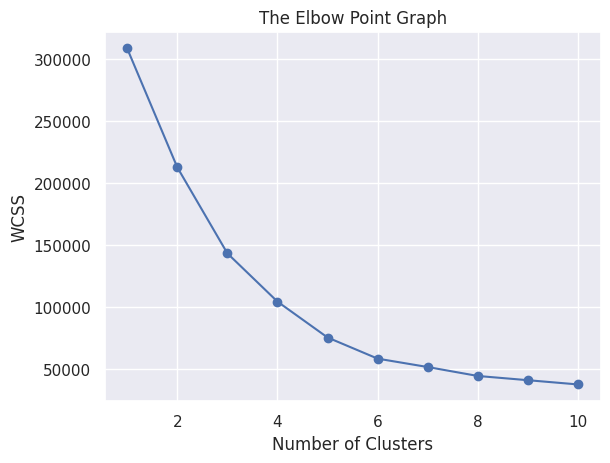

In [ ]:
sns.set()
plt.plot(range(1,11), wcss, marker="o")
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
model = KMeans(n_clusters = 5, init="k-means++", random_state = 42)

In [ ]:
model.fit_predict(x)
y = model.predict(x)
df1["KMeans"] = y
df1.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


In [ ]:
group1= df1[df1["KMeans"]==0]
group2= df1[df1["KMeans"]==1]
group3= df1[df1["KMeans"]==2]
group4= df1[df1["KMeans"]==3]
group5= df1[df1["KMeans"]==4]

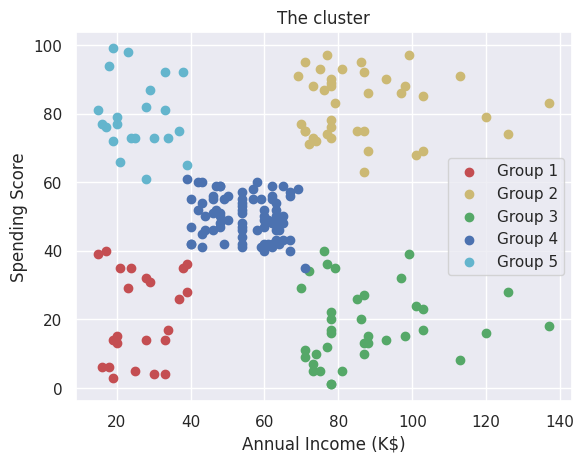

In [ ]:
plt.scatter(group1["Annual Income (k$)"], group1["Spending Score (1-100)"], c = "r" ,label="Group 1")
plt.scatter(group2["Annual Income (k$)"], group2["Spending Score (1-100)"], c = "y" ,label="Group 2")
plt.scatter(group3["Annual Income (k$)"], group3["Spending Score (1-100)"], c = "g" ,label="Group 3")
plt.scatter(group4["Annual Income (k$)"], group4["Spending Score (1-100)"], c = "b" ,label="Group 4")
plt.scatter(group5["Annual Income (k$)"], group5["Spending Score (1-100)"], c = "c" ,label="Group 5")
plt.legend()
plt.title("The cluster")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
df1["KMeans"].value_counts()

KMeans
3    79
1    39
2    37
0    23
4    22
Name: count, dtype: int64

<Axes: xlabel='KMeans', ylabel='count'>

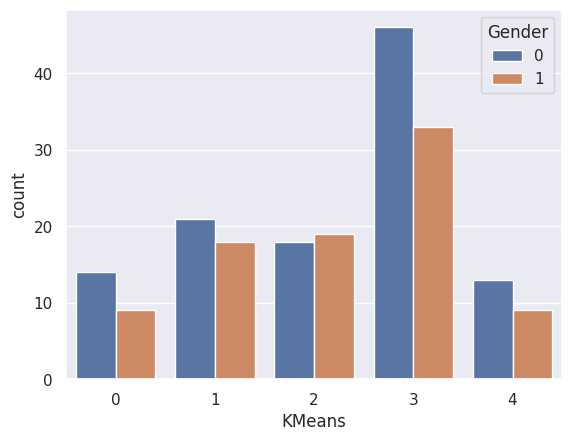

In [ ]:
sns.countplot(df1, x="KMeans", hue= "Gender")

<Axes: ylabel='count'>

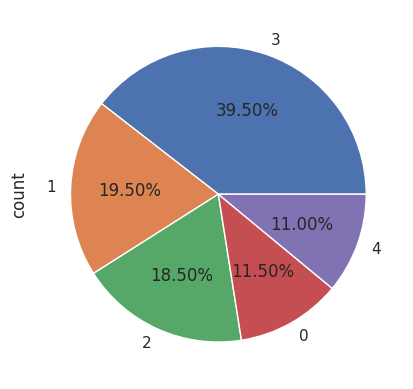

In [ ]:
df1["KMeans"].value_counts().plot.pie(autopct="%0.2f%%")

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

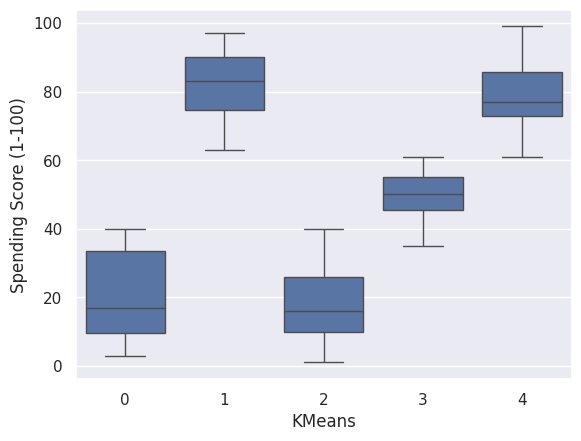

In [ ]:
sns.boxplot(data=df1, x="KMeans", y="Spending Score (1-100)")

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

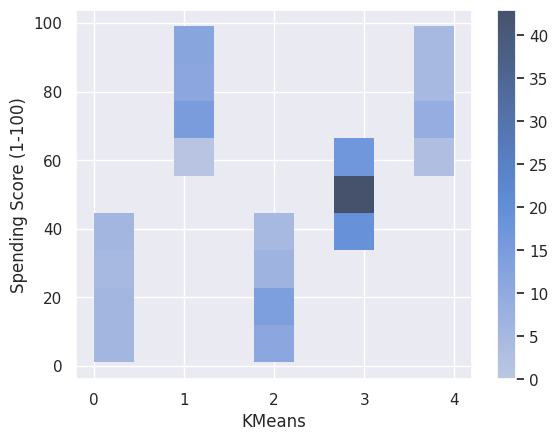

In [ ]:
sns.histplot(df1, x="KMeans", y = "Spending Score (1-100)", cbar = True)

<ipython-input-26-8cc428955b5c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df1, x="KMeans", y = "Spending Score (1-100)", thresh = .1, cmap= "Blues", shade = True)


<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

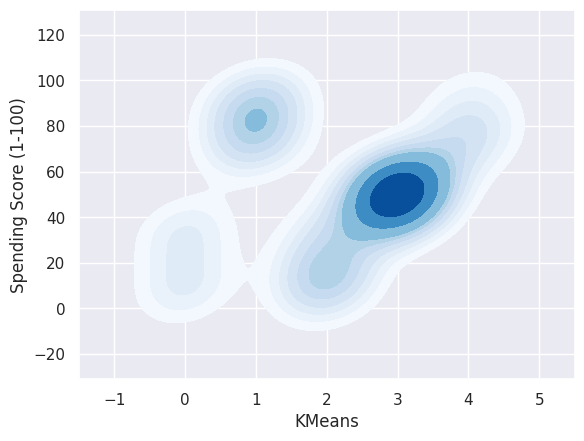

In [ ]:
sns.set_theme(style = "darkgrid")
sns.kdeplot(data = df1, x="KMeans", y = "Spending Score (1-100)", thresh = .1, cmap= "Blues", shade = True)